**Importing Libraries**

In [1]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.2-py3-none-any.whl size=58828 sha256=12dd578809a609223b4ba2fe31921e832b04c0dca344825a904ffa069b42b3e0
  Stored in directory: /root/.cache/pip/wheels/6b/c9/5c/e512a8e241fbcd5b0a5132e8f5d9add9c54fe6d592ae113867
Successfully built bioinfokit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Indian automobile.csv to Indian automobile.csv


In [4]:
df = pd.read_csv('Indian automobile.csv')

In [5]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [6]:
pd.pandas.set_option('Display.max_columns',None)
pd.pandas.set_option('Display.max_rows',None)

**Basic Information about the Dataset**

In [7]:
# first five record of the dataset
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [8]:
# last five record of the dataset
df.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000


In [9]:
# shape of the dataset
df.shape

(99, 13)

In [10]:
# features of the dataset
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [12]:
df.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [13]:
# summary  statistics of the dataset
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [14]:
# summary statistics of the categorical features
df.describe(include='object')

,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Make
count,99,99,99,99,99,99,99
unique,2,2,2,2,2,3,9
top,Salaried,Married,Post Graduate,No,No,Yes,SUV
freq,64,84,56,67,62,52,19


In [15]:
df['Profession'].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

In [16]:
df['Marrital Status'].value_counts()

Married    84
Single     15
Name: Marrital Status, dtype: int64

In [17]:
df['Wife Working'].value_counts()

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

In [18]:
df['Education'].value_counts()

Post Graduate    56
Graduate         43
Name: Education, dtype: int64

In [19]:
df['Make'].value_counts()

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

**Data Cleaning**

In [20]:
# checking null values
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [21]:
# checking duplicate values
df.duplicated().sum()

0

In [22]:
df[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [23]:
# Deleting inconsistant value
df.drop(index=11,axis=0,inplace=True)

<Axes: >

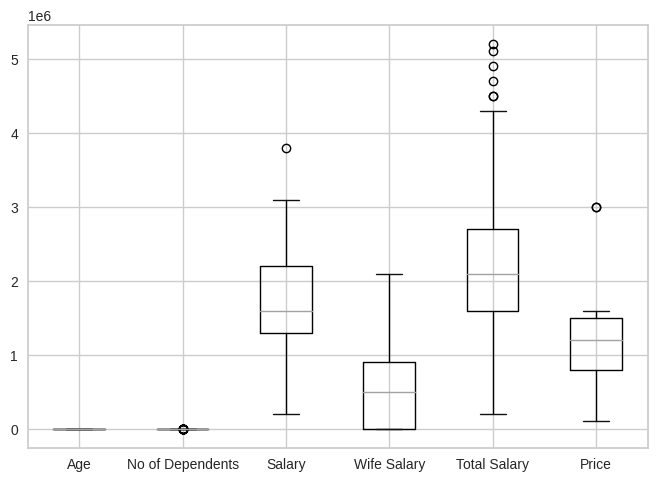

In [24]:
df.boxplot()

In [25]:
# removing outlier
df = df[df['Total Salary']<4700000]

<Axes: >

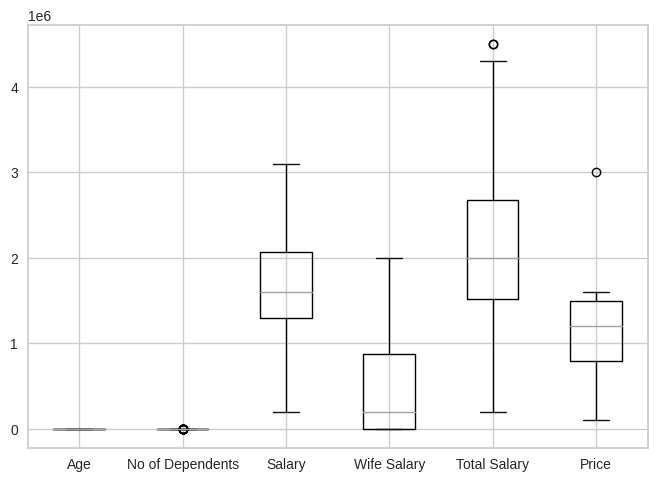

In [26]:
df.boxplot()

**Univariate Analysis**

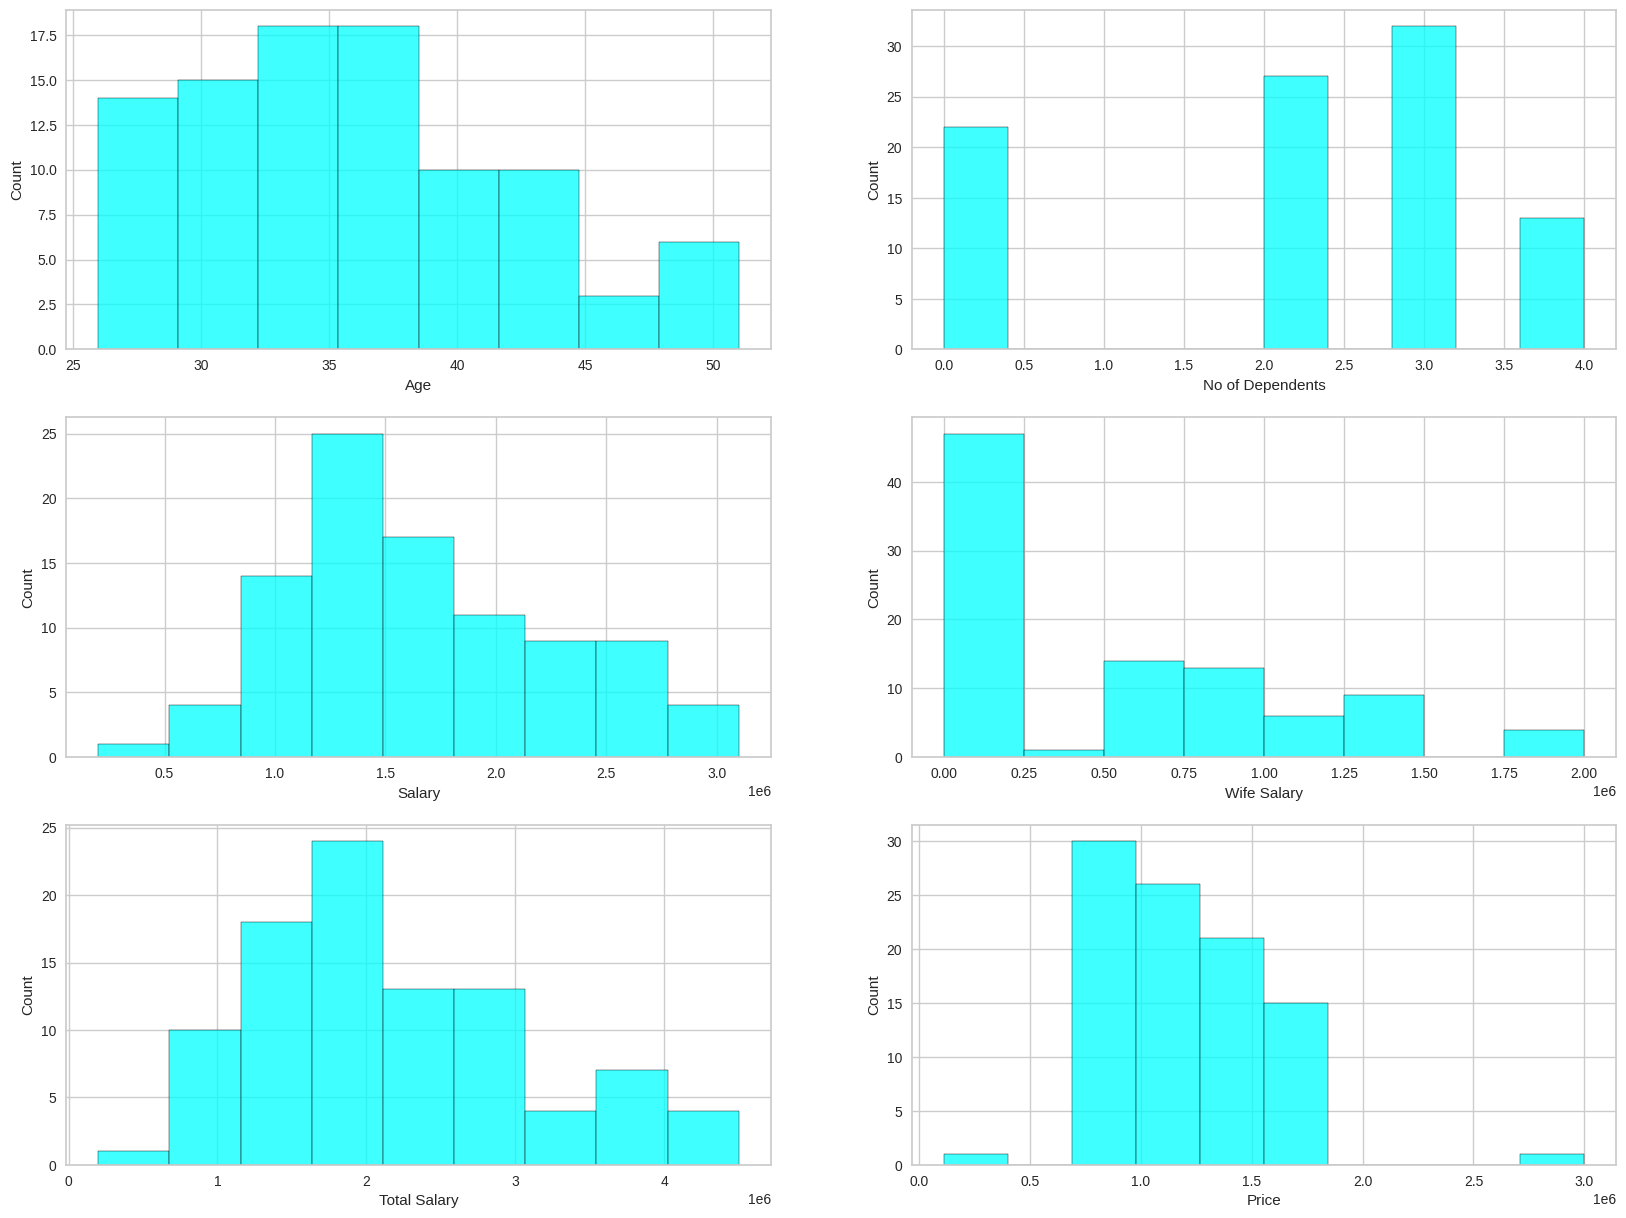

In [27]:
sns.set_palette(["cyan"])
fig,([ax0,ax1],[ax2,ax3],[ax4,ax5]) = plt.subplots(nrows=3,ncols=2,figsize=(20,15))
sns.histplot(x=df['Age'],ax=ax0)
sns.histplot(x=df['No of Dependents'],ax=ax1)
sns.histplot(x=df['Salary'],ax=ax2)
sns.histplot(x=df['Wife Salary'],ax=ax3)
sns.histplot(x=df['Total Salary'],ax=ax4)
sns.histplot(x=df['Price'],ax=ax5)
plt.show()

<Axes: xlabel='Wife Working', ylabel='count'>

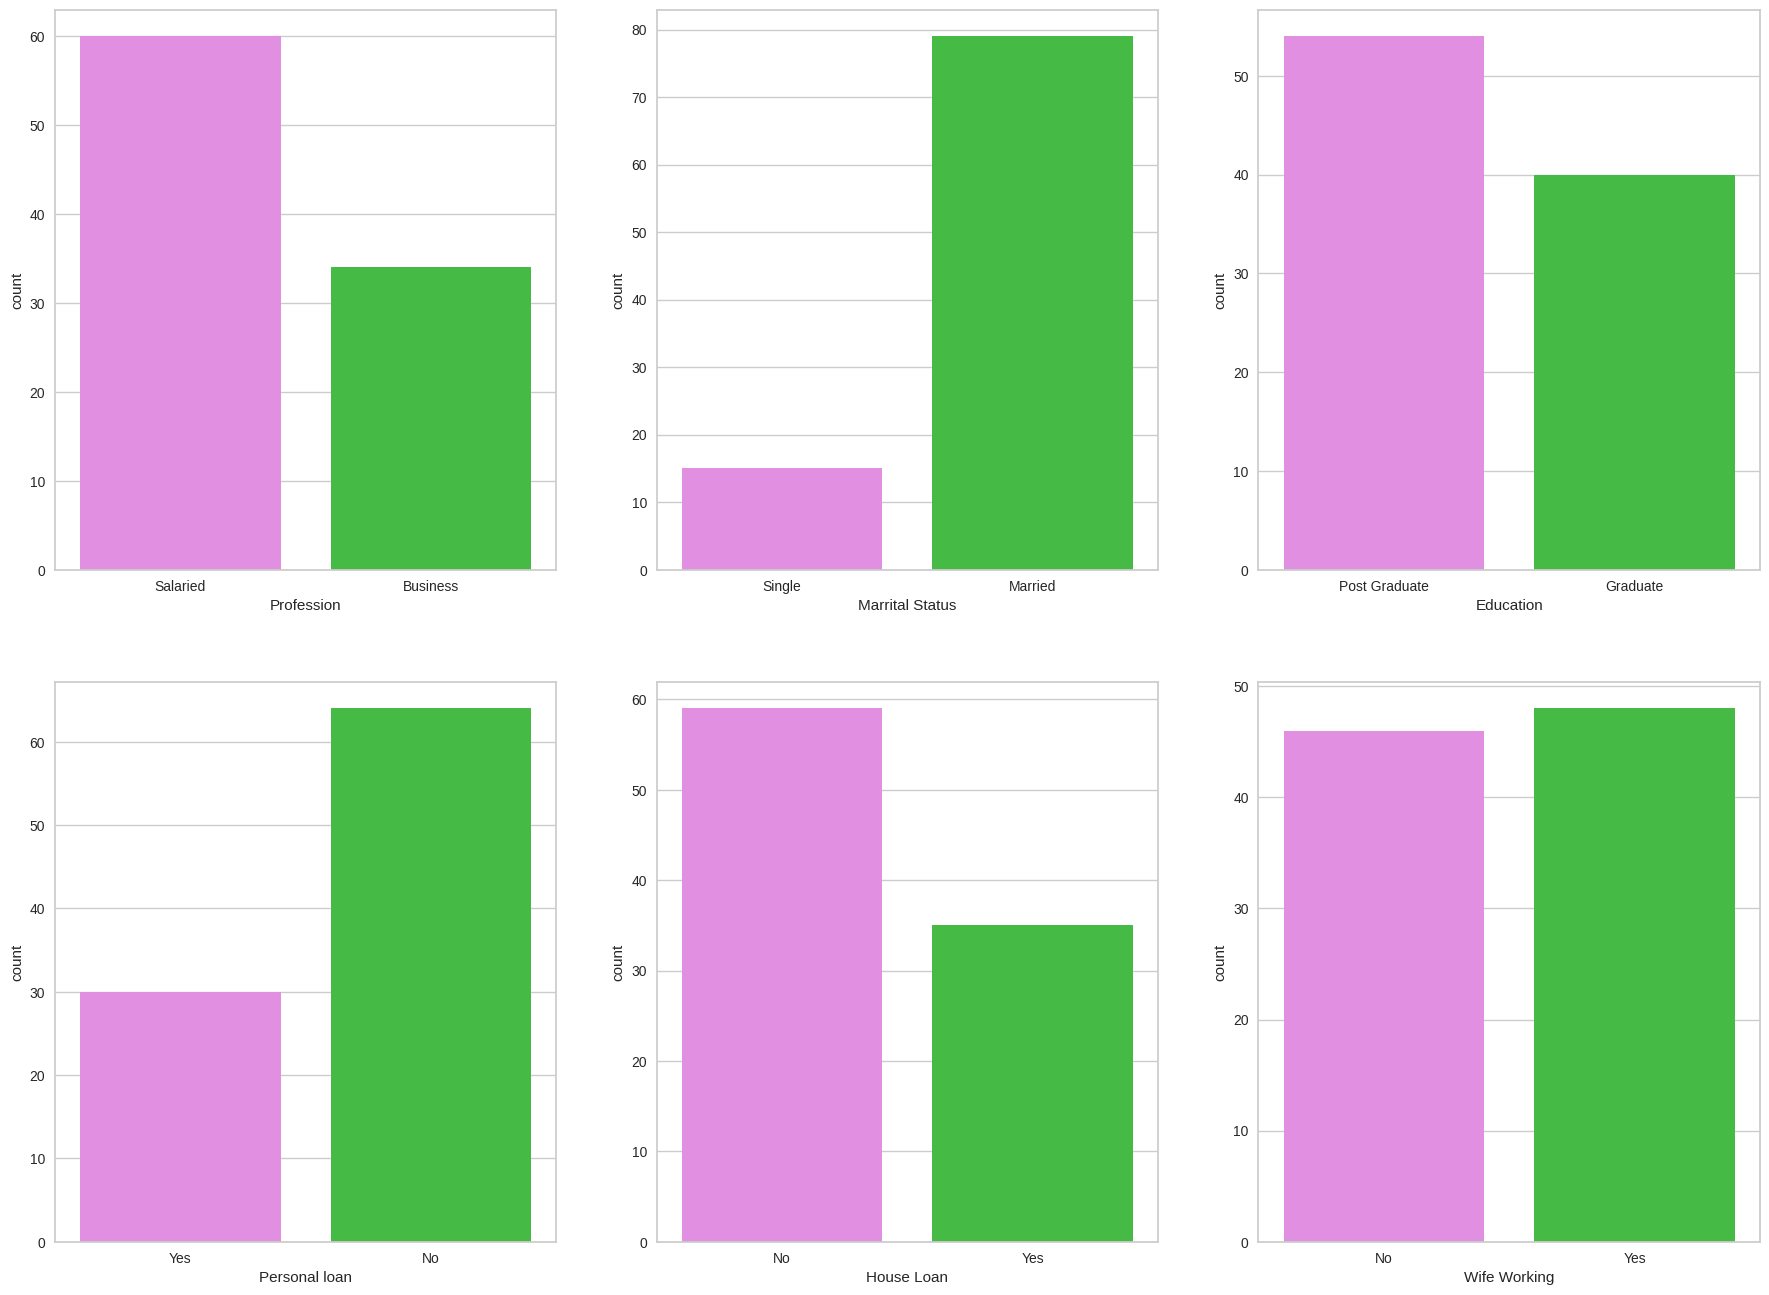

In [28]:
sns.set_palette(["violet",  "limegreen"])
fig,([ax0,ax1,ax2],[ax3,ax4,ax5]) = plt.subplots(nrows=2,ncols=3,figsize=(22,16))
sns.countplot(x=df['Profession'],ax=ax0)
sns.countplot(x=df['Marrital Status'],ax=ax1)
sns.countplot(x=df['Education'],ax=ax2)
sns.countplot(x=df['Personal loan'],ax=ax3)
sns.countplot(x=df['House Loan'],ax=ax4)
sns.countplot(x=df['Wife Working'],ax=ax5)

***Observation***:
* Major part of consumers are salarised and married. Also do not have any personal loan and house loan.
* Consumers with post graduate are more visible than graduate in the dataset.


<Axes: xlabel='Make', ylabel='count'>

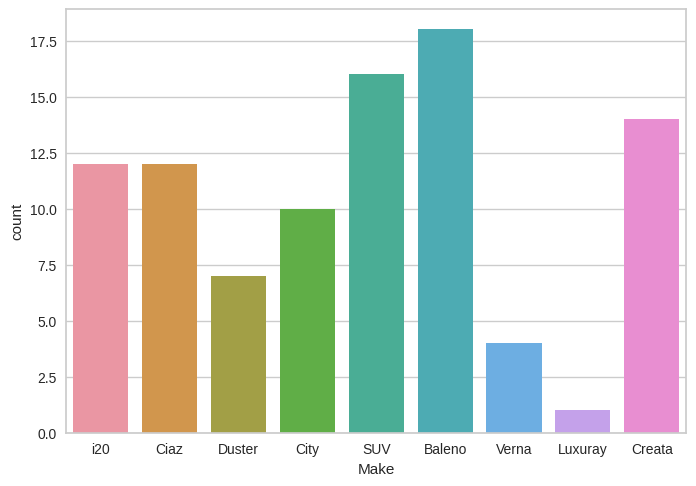

In [29]:
sns.countplot(x=df['Make'])

***Observation***:
* Major part of consumers purchased car with brand baleno, suv and creata.

**Bivariate Analysis**

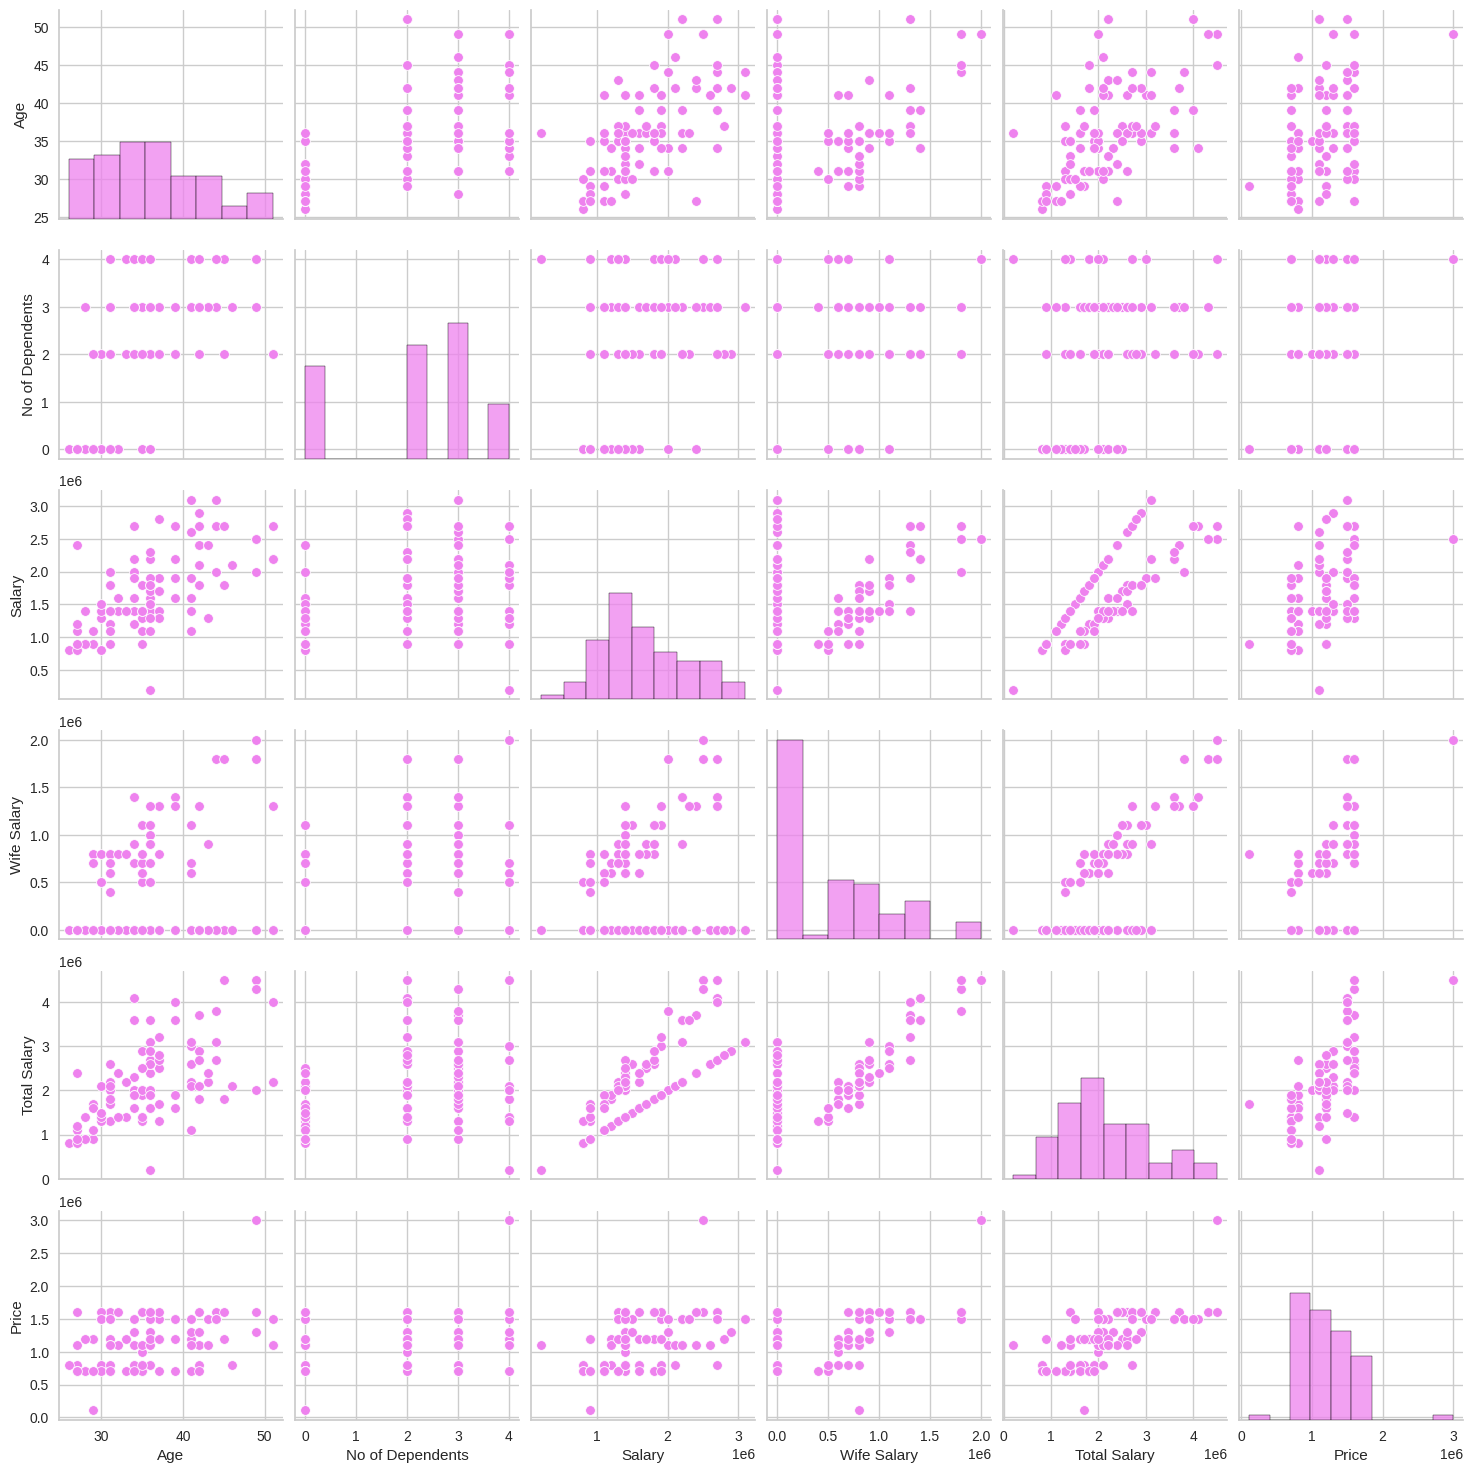

In [30]:
sns.pairplot(data=df)

<Axes: >

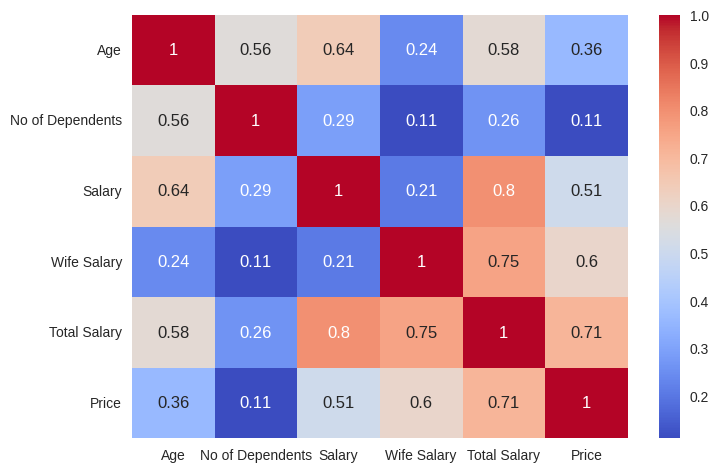

In [31]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

***Observation***:
* correlation found between : price and no of dependents,salary and total salary, salary and age, price and total salary, wife salary and total salary, wife salary and price



In [32]:
df.groupby(['Profession'])['Salary','Wife Salary','Price'].mean()

,Salary,Wife Salary,Price
Profession,,,
Business,1.514706e+06,379411.764706,1.105882e+06
Salaried,1.768333e+06,550000.000000,1.201833e+06


***Observation***:
* Generally salary, wife salary and price of salarised professional consumer are more than business professional consumer.

In [33]:
df.groupby(['Marrital Status'])['Salary','Price'].mean()

,Salary,Price
Marrital Status,,
Married,1.759494e+06,1.191266e+06
Single,1.240000e+06,1.040000e+06


***Observation***:
* Generally salary and price of married consumer are more than single consumer.

**Data Pre-processing**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               94 non-null     int64 
 1   Profession        94 non-null     object
 2   Marrital Status   94 non-null     object
 3   Education         94 non-null     object
 4   No of Dependents  94 non-null     int64 
 5   Personal loan     94 non-null     object
 6   House Loan        94 non-null     object
 7   Wife Working      94 non-null     object
 8   Salary            94 non-null     int64 
 9   Wife Salary       94 non-null     int64 
 10  Total Salary      94 non-null     int64 
 11  Make              94 non-null     object
 12  Price             94 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.3+ KB


In [35]:
df['Profession'] = df['Profession'].replace(['Salaried','Business'],[1,0])
df['Marrital Status'] = df['Marrital Status'].replace(['Married','Single'],[1,0])
df['Education'] = df['Education'].replace(['Post Graduate','Graduate'],[1,0])
df['Personal loan'] = df['Personal loan'].replace(['Yes','No'],[1,0])
df['House Loan'] = df['House Loan'].replace(['Yes','No'],[1,0])
df['Wife Working'] = df['Wife Working'].replace(['Yes','No'],[1,0])
df['Make'] = df['Make'].replace(['Baleno','SUV','Creata','i20','Ciaz','City','Duster','Verna','Luxuray'],[0,1,2,3,4,5,6,7,8])

In [36]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,0,1,0,1,0,0,800000,0,800000,3,800000
1,35,1,1,1,2,1,1,1,1400000,600000,2000000,4,1000000
2,45,0,1,0,4,1,1,0,1800000,0,1800000,6,1200000
3,41,0,1,1,3,0,0,1,1600000,600000,2200000,5,1200000
4,31,1,1,1,2,1,0,1,1800000,800000,2600000,1,1600000


<Axes: >

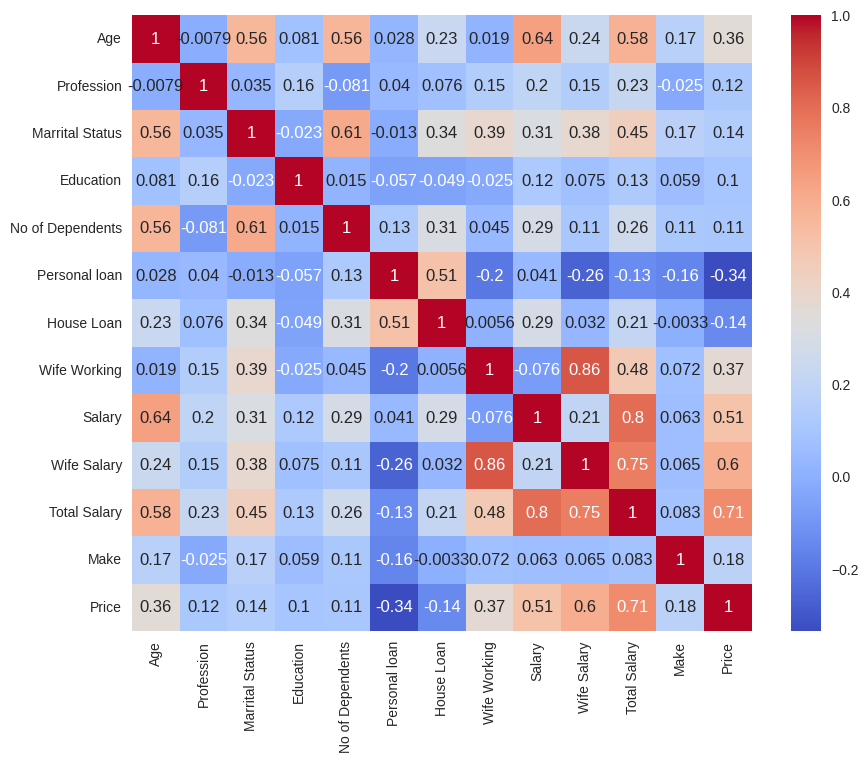

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

**Extracting Segments**

**Applying Principal Component Analysis**

In [38]:
# scaling the dataset
scaled_data = preprocessing.scale(df)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=13)
pc = pca.fit_transform(scaled_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13
0,-3.838261,-0.567008,-0.789106,-1.476924,-1.041869,-0.433169,-0.664236,1.067187,0.389465,-0.249806,0.121247,-0.365494,5.876299e-16
1,0.257336,0.751385,1.140306,-1.278661,-1.631061,-0.367014,-0.699245,0.212399,0.230037,-0.088784,-0.294799,0.288713,3.246605e-17
2,0.311288,3.016306,0.258639,1.699138,0.299857,-1.314317,-0.798005,0.739904,-0.071827,-0.472885,-0.301617,-0.050490,-1.749336e-16
3,0.901578,-0.542490,0.125428,1.883523,-0.783199,0.623838,-0.731868,0.133569,0.458884,-0.089344,0.290398,0.644394,-8.658606e-17
4,0.810059,-0.744207,0.227742,-1.585097,-0.250426,0.686034,-0.273684,1.386069,0.295812,1.241628,-0.592420,0.096094,-7.792342e-17


In [41]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
feature,,,,,,,,,,,,,
Age,0.350403,0.278508,-0.188461,0.215873,0.074393,0.093012,0.091825,0.073944,0.463215,-0.674737,-0.090881,0.106539,1.935838e-17
Profession,0.101236,-0.069042,-0.127250,-0.557894,-0.350088,-0.232378,0.668115,0.123138,-0.046924,-0.120667,-0.026886,-0.044260,1.713599e-16
Marrital Status,0.329720,0.207997,0.323587,0.208507,-0.176891,0.132648,0.279433,-0.264617,0.255002,0.450921,-0.454151,-0.168043,-1.859452e-16
Education,0.065216,-0.052409,-0.364536,-0.147765,-0.648203,0.540512,-0.341928,-0.060549,0.002781,0.032022,-0.051060,0.041692,-7.453961e-17
No of Dependents,0.242543,0.361410,0.135957,0.307844,-0.109563,0.270867,0.229222,0.412686,-0.526661,0.036172,0.330777,0.031374,9.589383e-17
Personal loan,-0.074201,0.447325,0.167726,-0.381667,-0.010017,-0.106863,-0.328550,0.587244,0.325082,0.200917,-0.065977,-0.076634,3.930965e-17
House Loan,0.128993,0.445981,0.244538,-0.296680,-0.066504,-0.197204,-0.283808,-0.451846,-0.432873,-0.302922,-0.166476,0.042002,-6.160268e-17
Wife Working,0.266933,-0.344231,0.507501,-0.113454,-0.107933,0.027948,-0.081255,0.081236,0.109562,-0.016618,0.083222,0.703552,-1.461659e-16
Salary,0.346724,0.202741,-0.427615,-0.133177,0.230486,-0.118207,-0.009366,-0.188803,0.051842,0.374343,0.253604,0.286171,-4.962134e-01


**Interpretation** :
* The column PC1 indicates how the first principal component is composed of the original variables. For the first principal component total **Salary**, **Wife Salary** and **Age** are important variables. For the second principal component **Personal loan**, **House Loan** and **No of Dependents** are important variables. For the third principal component **Wife Working** and Salary are important variables.

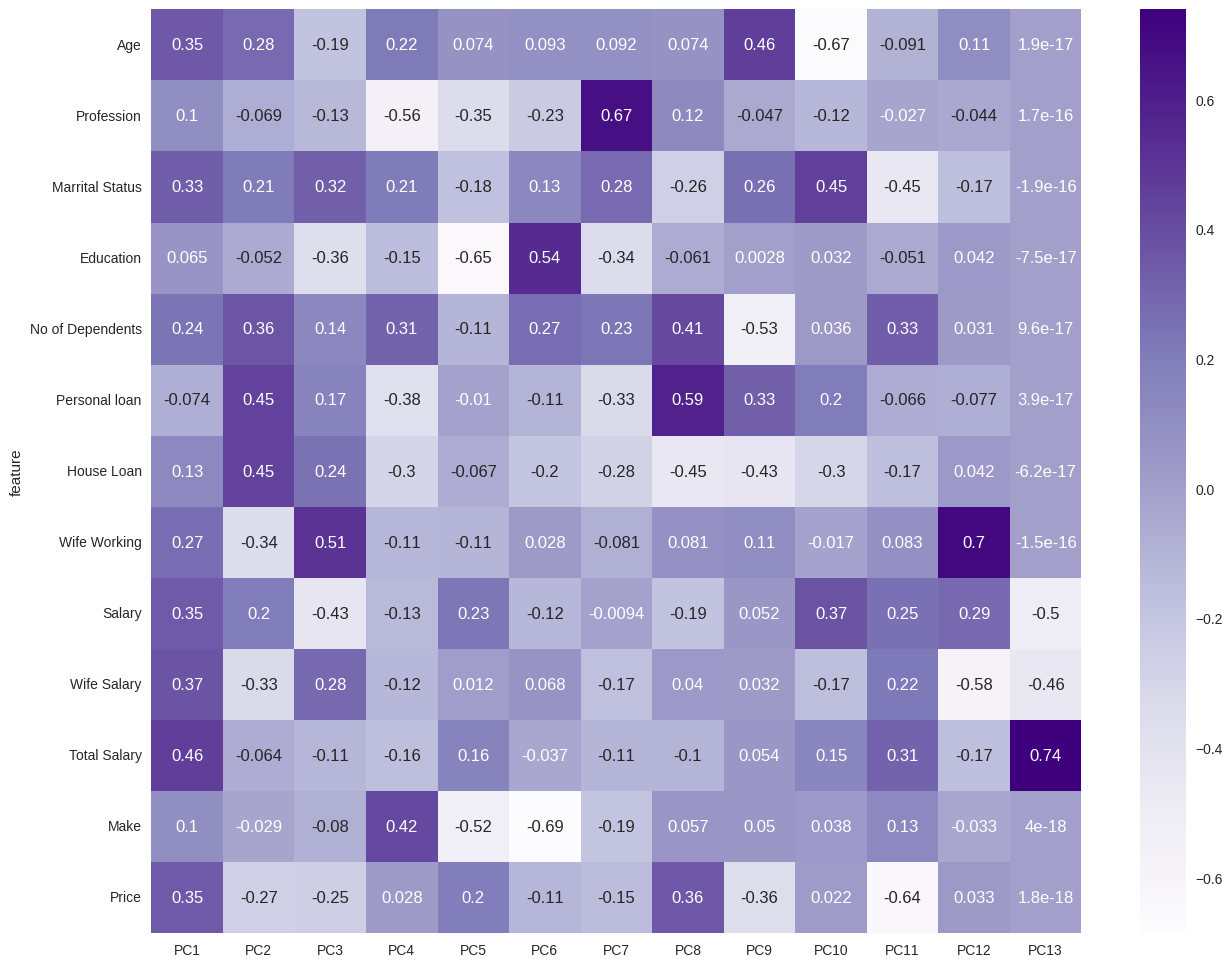

In [42]:
# correlation matrix plot of principal components
plt.rcParams['figure.figsize'] = (15,12)
ax = sns.heatmap(loadings_df, annot=True, cmap='Purples')
plt.show()

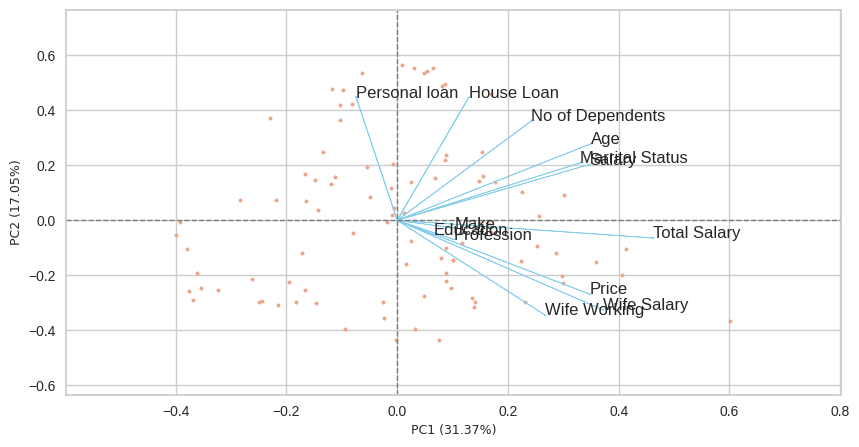

In [43]:
# get PC scores
pca_scores = PCA().fit_transform(scaled_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

**Interpretation**:
*  From the above figure, we can say that **Persnal loan**, **House** **Loan** , **No of Dependents**  are quite unique. We can be interpreted as : attributes **Age**, **Marrital Status** , **Salary** point in the same direction, attributes **Total Salary**, **Make**, **Education**, **Profession** point in the same direction and **Price**, **Wife Salary**, Wife **Working** point in the same direction.

**Applying the Elbow Method**

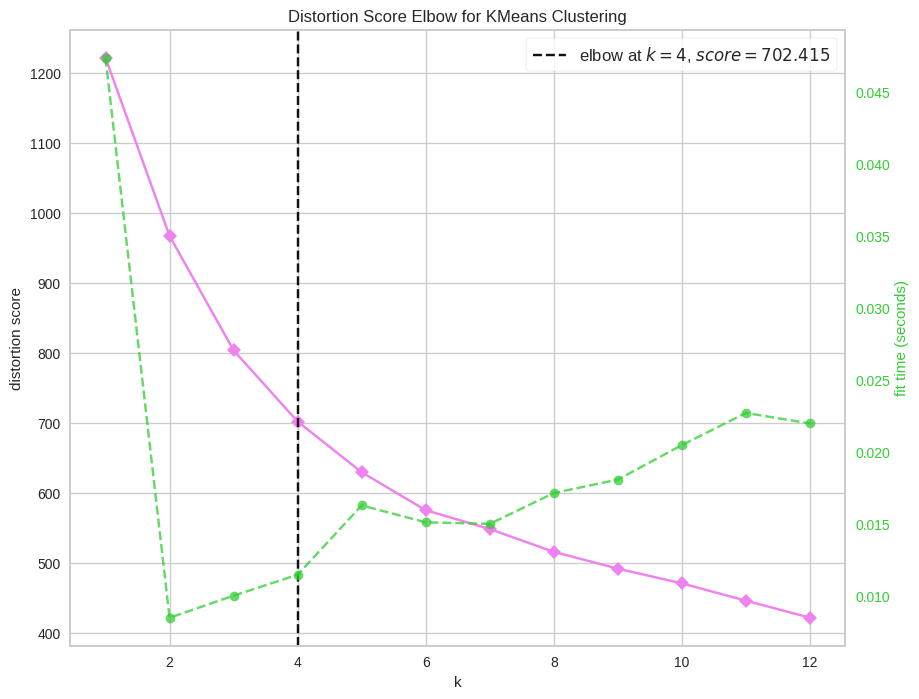

In [44]:
# using k-means clustering analysis for extracting segments
model = KMeans()
plt.figure(figsize=(10,8))
visualizer = KElbowVisualizer(model, k=(1,13)).fit(pf)
visualizer.show();

**Applying Clustering Algorithms**

**K-means Clustering**

In [45]:

# k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(pf)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

Labels: [3 0 2 0 0 2 0 2 2 0 0 0 3 0 1 3 3 3 0 0 0 0 0 0 1 2 2 0 1 2 0 1 0 2 1 0 0
 3 0 0 3 0 0 2 1 2 0 0 1 2 1 2 1 2 2 3 3 3 3 3 3 2 0 2 1 2 1 2 0 1 2 0 0 1
 2 1 2 1 2 2 2 2 2 3 0 1 2 2 2 3 3 2 1 2]
WCSS: 702.9922669051779
No. of iterations:  5
Cluster centroids:  [[ 2.19918375e-01 -7.37678865e-01  1.05897360e+00  1.99262253e-01
  -4.83180989e-01 -9.98111286e-02 -2.23912584e-02 -1.34188576e-05
   9.69426283e-02  5.52205066e-02 -8.86373175e-02  1.39265038e-01
   5.54558728e-18]
 [ 2.83706451e+00 -7.46507991e-01  4.23590389e-02 -6.52443265e-01
   5.10203128e-01  2.70794323e-01 -1.36118323e-01  3.48774074e-02
  -9.58007330e-02 -8.47575501e-02  1.81686803e-01 -1.46796975e-01
   2.32671442e-17]
 [-2.19029732e-01  1.65622369e+00 -5.12938278e-01  4.34231352e-01
   5.85741851e-03  6.83392996e-02  3.50737747e-01 -1.21279185e-01
   4.06825086e-02  9.12034191e-02 -8.64262213e-02 -5.97146589e-02
   1.42407285e-17]
 [-3.00235789e+00 -1.03262078e+00 -1.03676407e+00 -5.21718998e-01
   3.52524783e-01

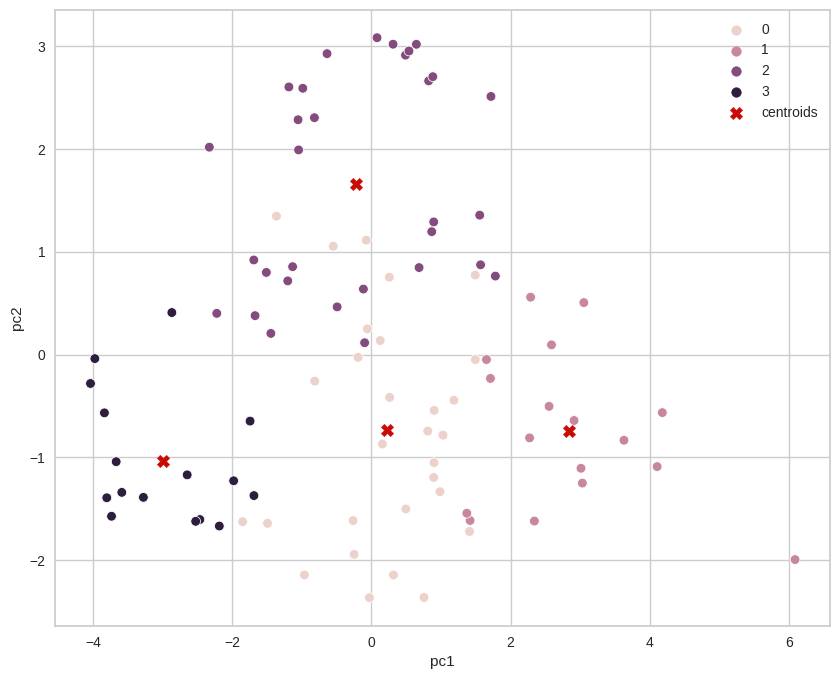

In [46]:
# cluster visualization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(pf)
plt.figure(figsize=(10,8))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<Axes: xlabel='cluster_num', ylabel='count'>

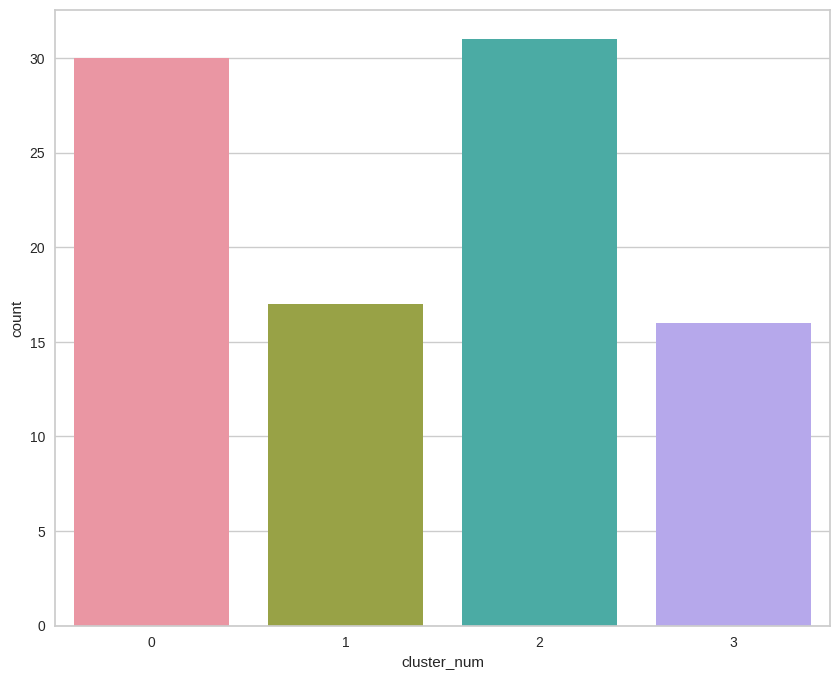

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['cluster_num'])

**Observation** :
* Major part of the customer belongs to cluster 0 and cluster 2.




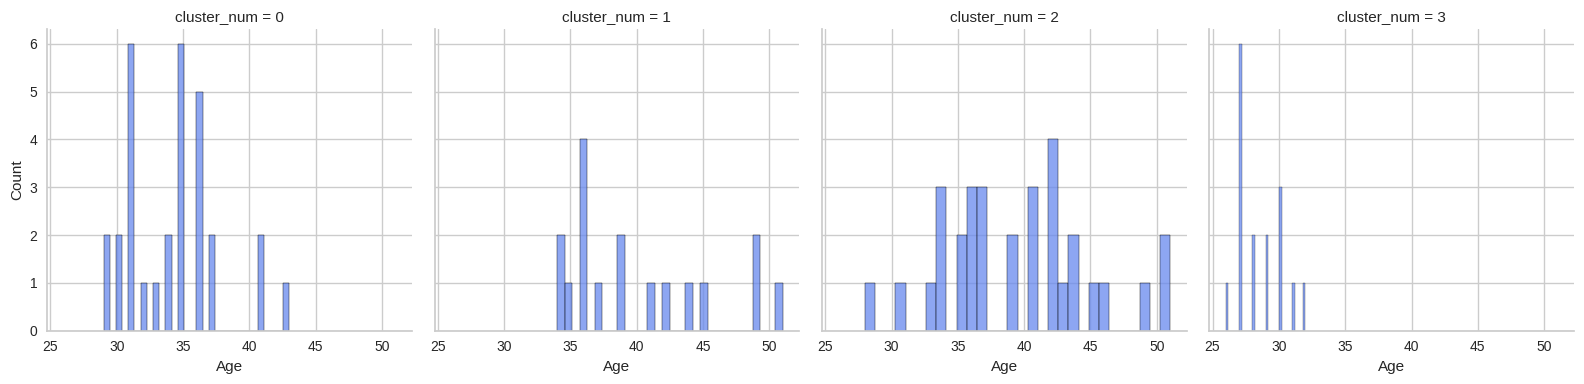

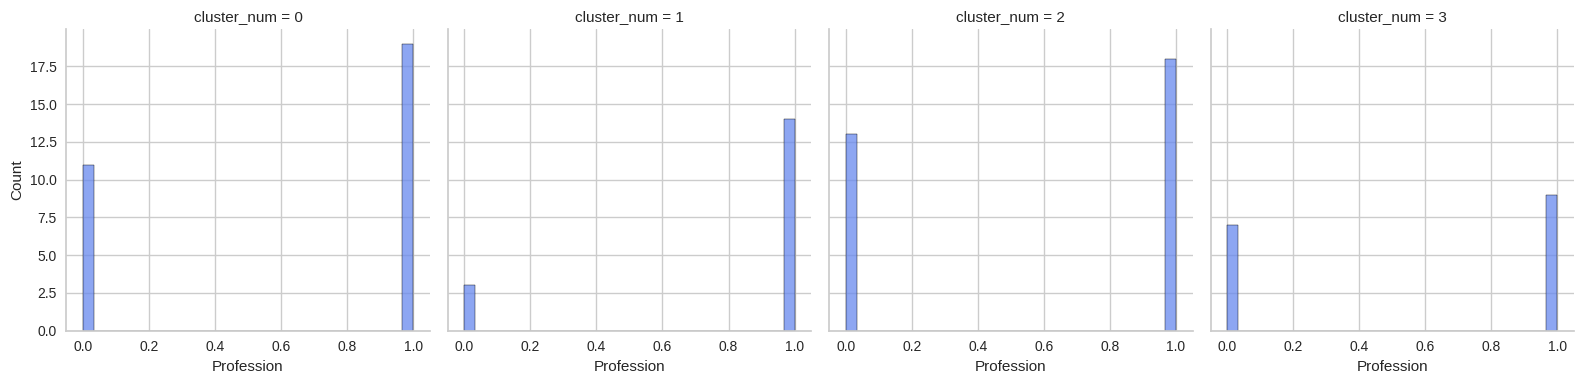

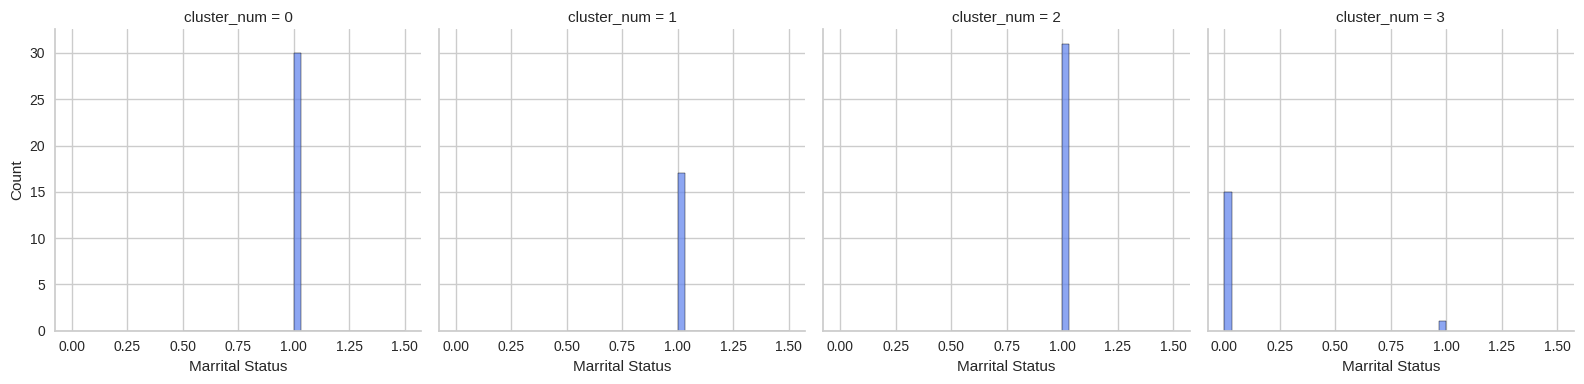

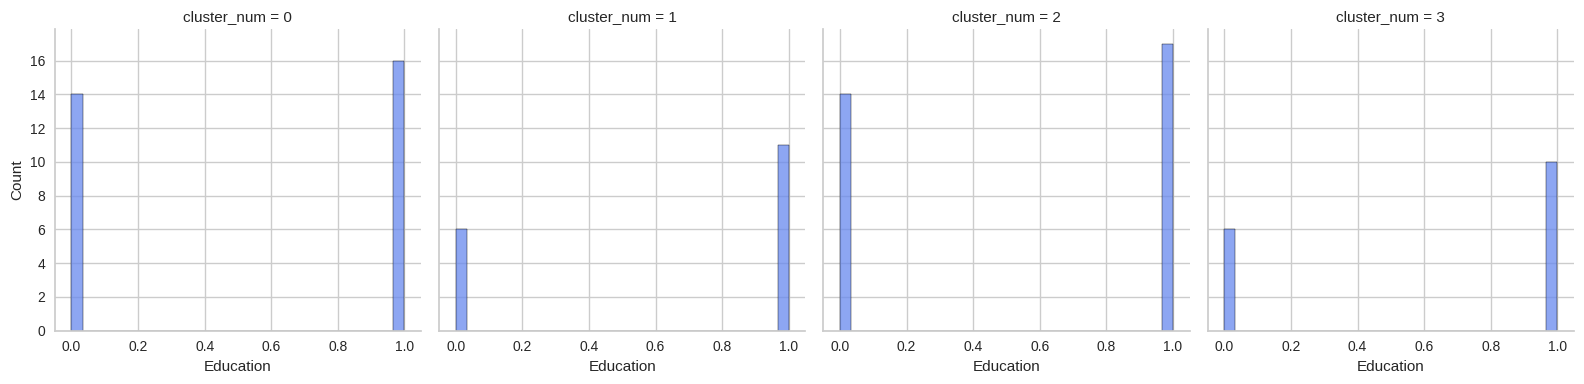

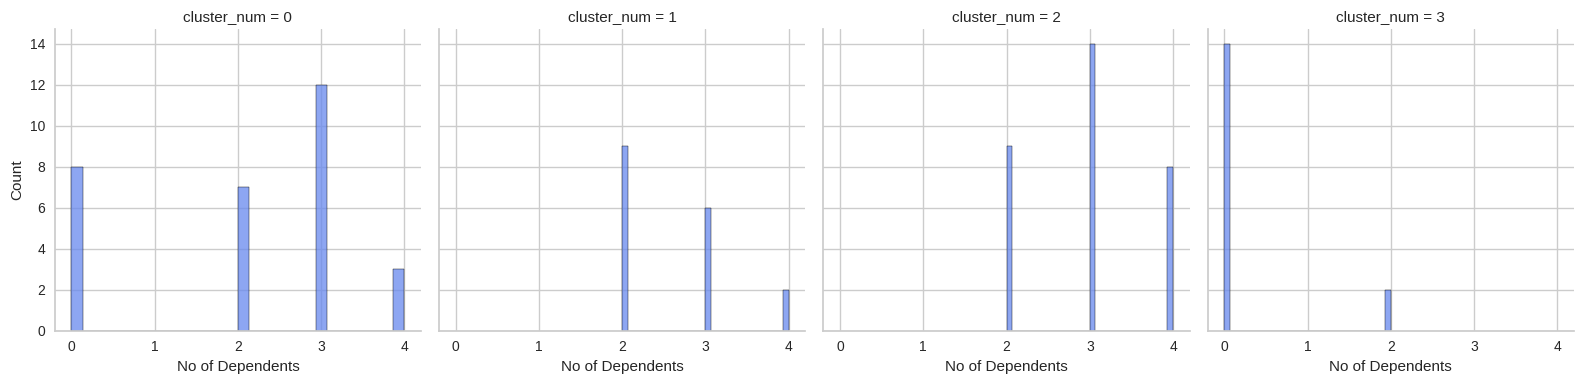

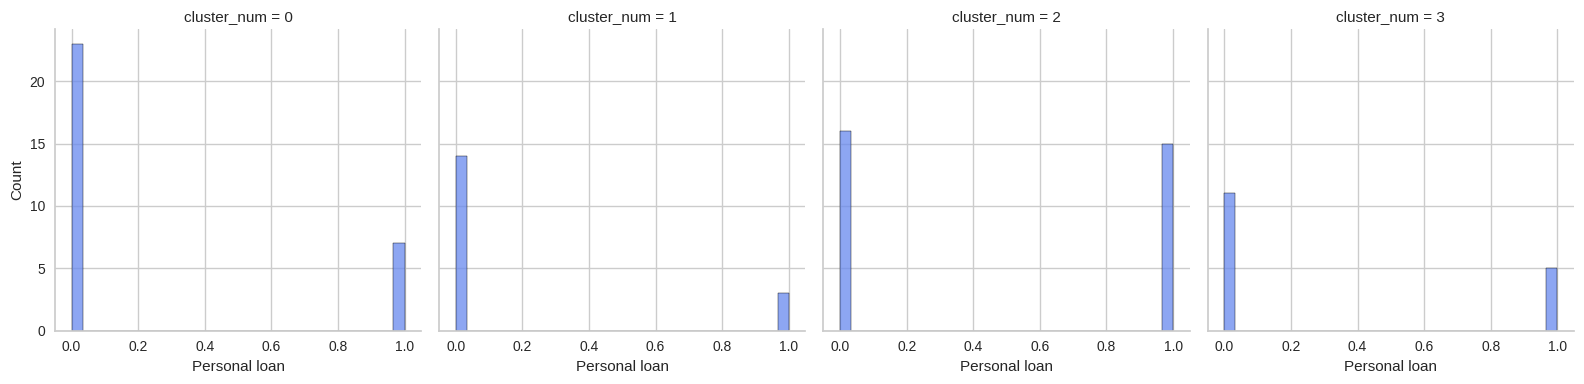

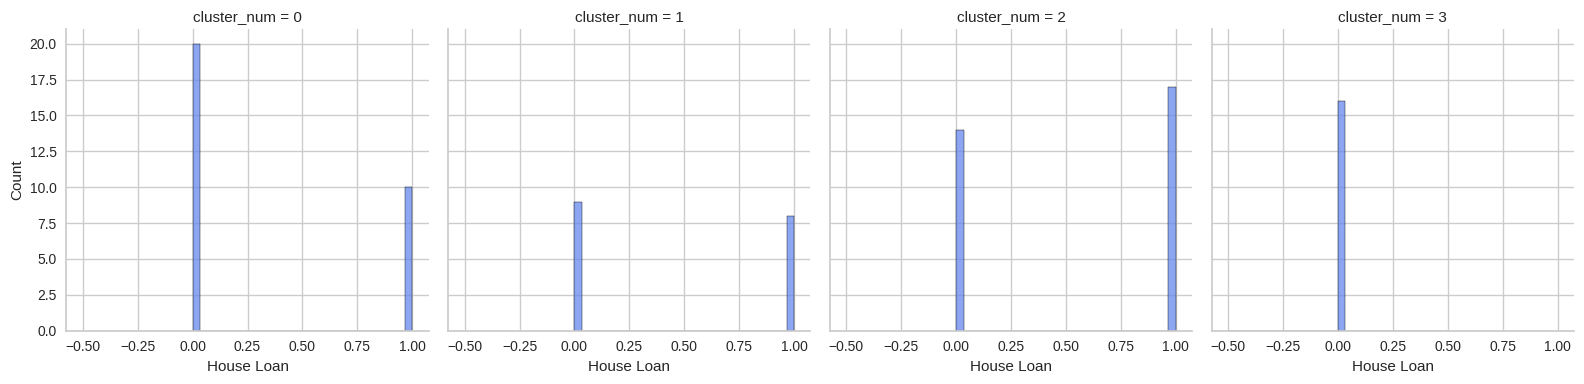

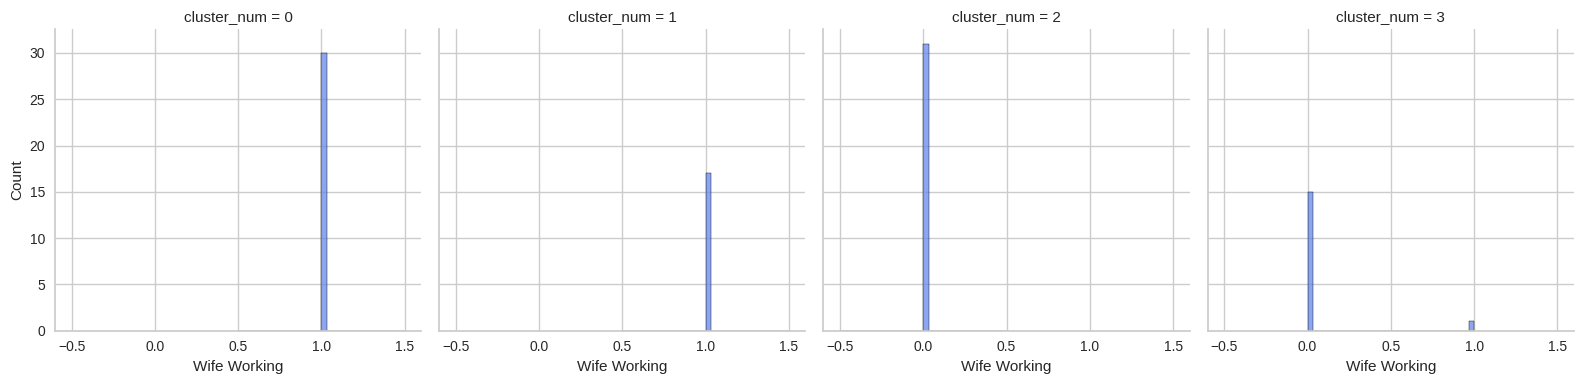

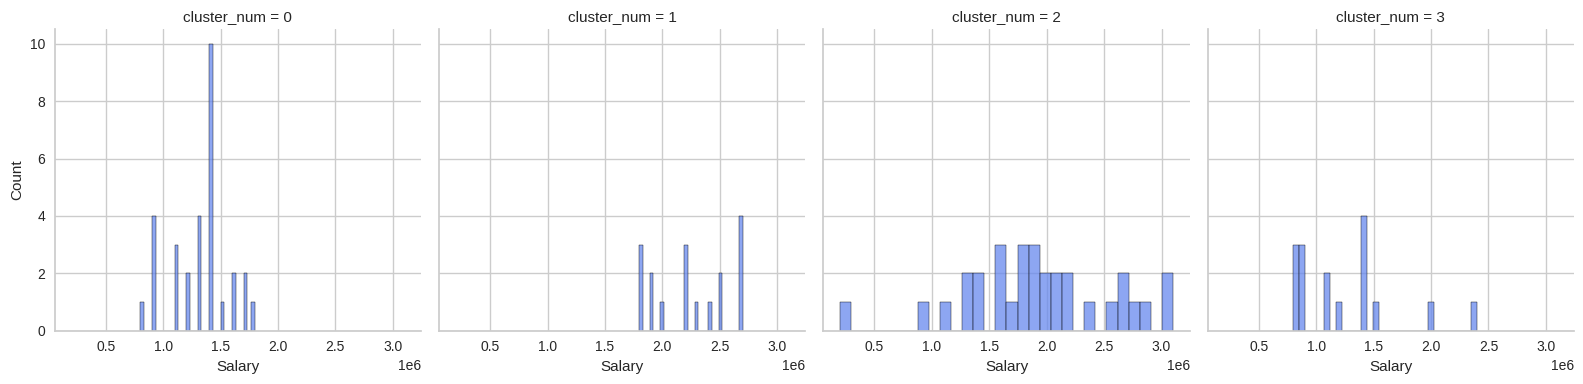

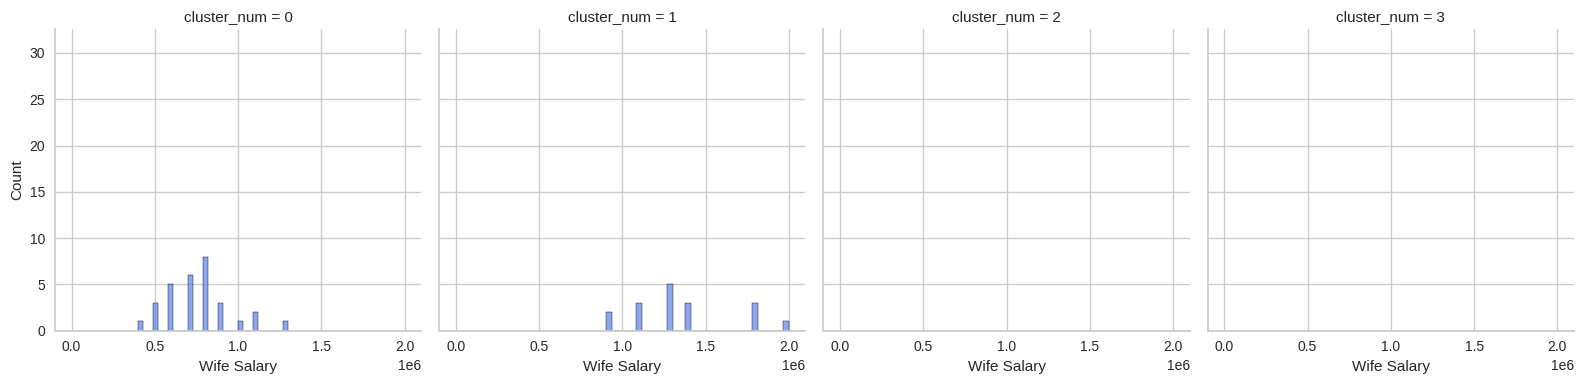

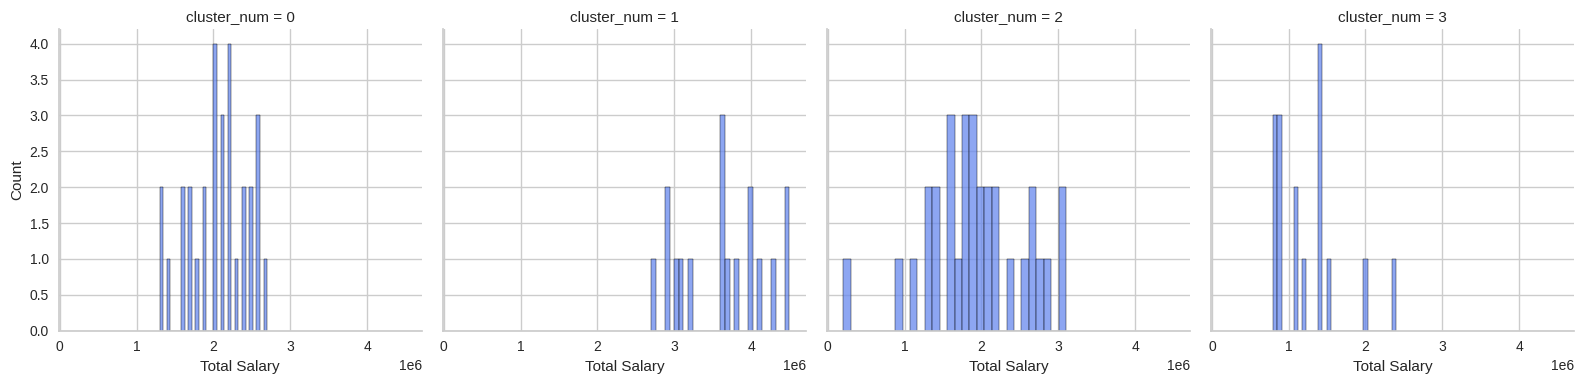

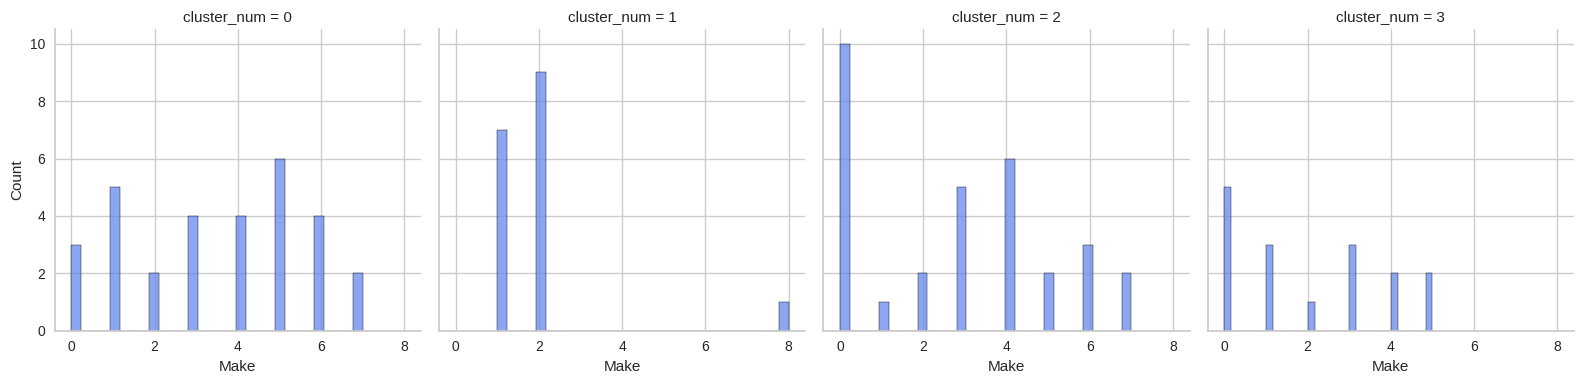

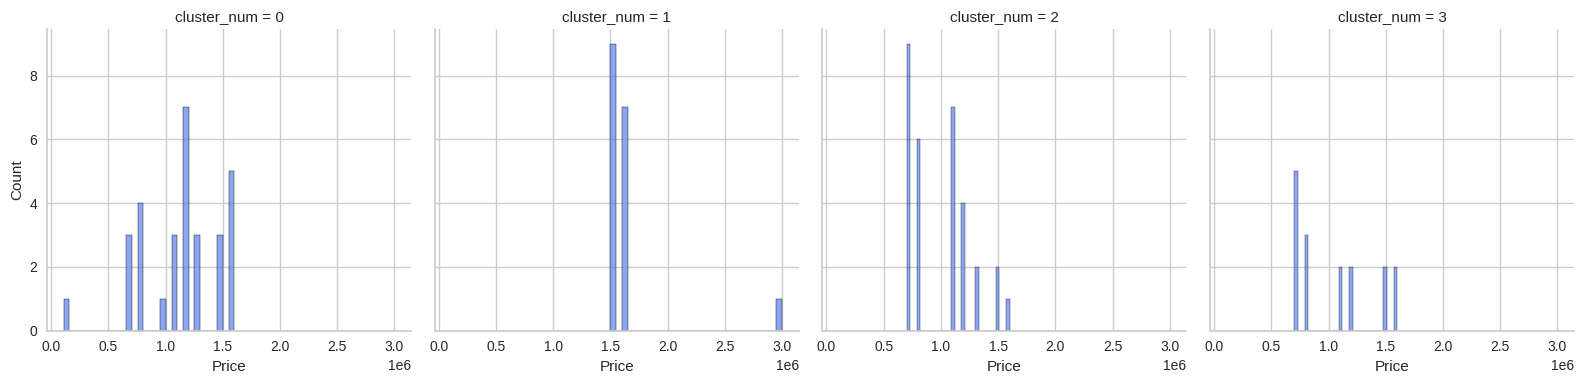

In [48]:
sns.set_palette('coolwarm')
for i in df.drop(['cluster_num'],axis=1):
  grid = sns.FacetGrid(df,height=4, col='cluster_num')
  grid = grid.map(sns.histplot,i,bins=30)
plt.savefig('count6.png')
plt.show()

**Observation** :
* In cluster 3, Salaried and Business professional are almost same. In case of other cluster, salaried professional are more than Business professional.
* Cluster 0, Cluster 1 and Cluster 2 do not contain customer with 'Single' Marrital Status. In case of Cluster 3, most of the customers are single.
* In Cluster 1, Cluster 2 and Cluster 3, all customers are dependent.
* In Cluster 0, most of the customers do not have personal loan. In case of the Cluster 2, customers, have personal loan and do not have personal loan, are almost same.
* In Cluster 3 , customers do not have any house loan.
* In Cluster 0 and Cluster 1, all customer's wife engage with work. In case of cluster 2, all customer's wife do not engage with work.







***Selecting Target Segments***

In [49]:
price = df.groupby('cluster_num')['Price'].mean()
price = price.to_frame().reset_index()
price

,cluster_num,Price
0,0,1.150333e+06
1,1,1.629412e+06
2,2,9.935484e+05
3,3,1.043750e+06


In [50]:
df['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(df['cluster_num'], df['Make'])
crosstab

Make,0,1,2,3,4,5,6,7,8
cluster_num,,,,,,,,,
0,3,5,2,4,4,6,4,2,0
1,0,7,9,0,0,0,0,0,1
2,10,1,2,5,6,2,3,2,0
3,5,3,1,3,2,2,0,0,0


In [51]:
df['cluster_num'] = kmeans.labels_
crosstab = pd.crosstab(df['cluster_num'], df['Price'])
crosstab

Price,110000,700000,800000,1000000,1100000,1200000,1300000,1500000,1600000,3000000
cluster_num,,,,,,,,,,
0,1,3,4,1,3,7,3,3,5,0
1,0,0,0,0,0,0,0,9,7,1
2,0,9,6,0,7,4,2,2,1,0
3,0,5,3,0,2,2,0,2,2,0


In [52]:
Make = df.groupby('cluster_num')['Make'].mean()
Make = Make.to_frame().reset_index()
Make

,cluster_num,Make
0,0,3.500000
1,1,1.941176
2,2,2.774194
3,3,2.000000


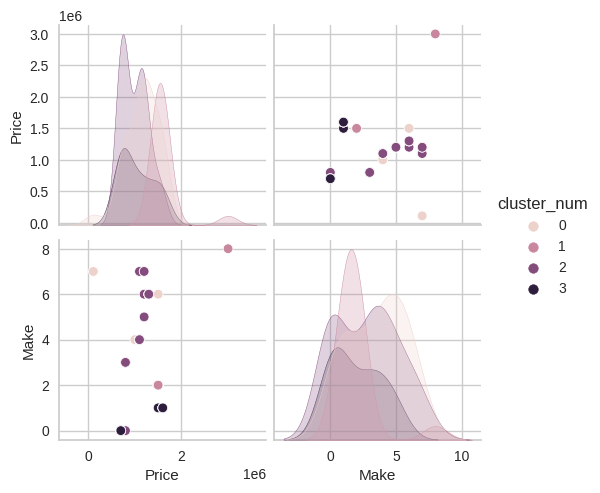

In [53]:
df_ = df[['Price','Make','cluster_num']]
sns.pairplot(data=df_,hue='cluster_num')

**Hierarchical Clustering**

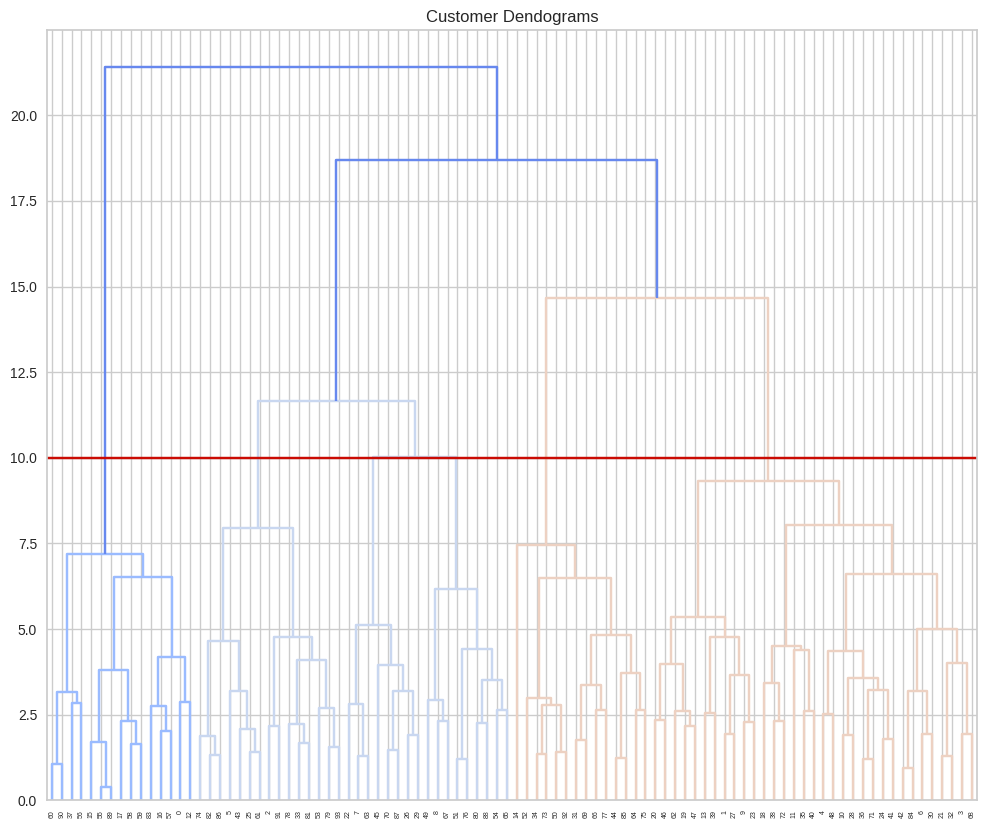

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(pf, method='ward'))
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.show()

**Observation** :   

*  From Dendogram we observe 4 clusters.

In [55]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [56]:
HierarchicalClustering = cluster.fit_predict(pf)

<Axes: ylabel='count'>

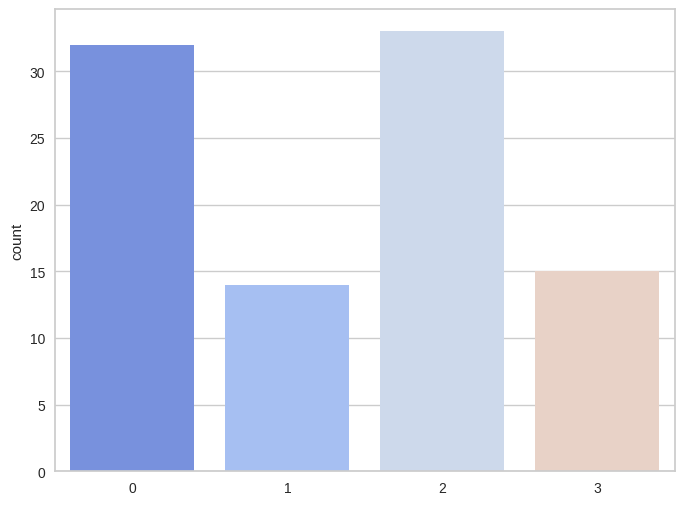

In [57]:
plt.figure(figsize=(8,6))
sns.countplot(x=HierarchicalClustering)

**Observation** :

* Major part of consumer belongs to Cluster 0 and Cluster 2.

<Axes: xlabel='pc1', ylabel='pc2'>

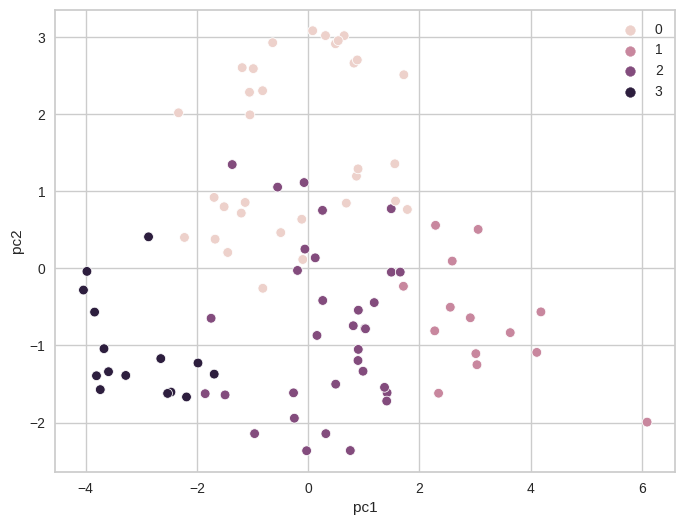

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=cluster.labels_)

**Classification**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop(['cluster_num'],axis=1)
y = df['cluster_num']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape

((75, 13), (75,))

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [64]:
#using logisitc regression for classification
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

## predictions
preds = clf.predict(x_test)

In [65]:
## performmance of the model
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [66]:
confusion_matrix(y_test,preds)

array([[6, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 3]])